In [1]:
import pandas as pd
df = pd.read_csv('NFL2009-2017v4.csv', low_memory=False)

In [2]:
pd.set_option('max_colwidth',200)
df[df['PlayType']=='No Play']['desc'].sample(5)

148999                                                                                                                  (12:02) PENALTY on PHI-J.Babin, Defensive Offside, 5 yards, enforced at PHI 24 - No Play.
330033                                                                                                   (:41) (No Huddle) PENALTY on OAK-D.Autry, Neutral Zone Infraction, 6 yards, enforced at SD 49 - No Play.
83085                                                                                                                (5:37) (Shotgun) PENALTY on SEA-R.Okung, False Start, 5 yards, enforced at SEA 19 - No Play.
66909                                                         (13:48) D.McFadden up the middle to OAK 27 for no gain (Team). PENALTY on OAK-R.Gallery, Offensive Holding, 10 yards, enforced at OAK 27 - No Play.
367373    (6:42) (Field Goal formation) B.McManus 50 yard field goal is GOOD, NULLIFIED by Penalty, Center-C.Kreiter, Holder-R.Dixon. PENALTY on DAL-D.Lawrence,

In [3]:
for col in df.columns:
    print(col)

Date
GameID
Drive
qtr
down
time
TimeUnder
TimeSecs
PlayTimeDiff
SideofField
yrdln
yrdline100
ydstogo
ydsnet
GoalToGo
FirstDown
posteam
DefensiveTeam
desc
PlayAttempted
Yards.Gained
sp
Touchdown
ExPointResult
TwoPointConv
DefTwoPoint
Safety
Onsidekick
PuntResult
PlayType
Passer
Passer_ID
PassAttempt
PassOutcome
PassLength
AirYards
YardsAfterCatch
QBHit
PassLocation
InterceptionThrown
Interceptor
Rusher
Rusher_ID
RushAttempt
RunLocation
RunGap
Receiver
Receiver_ID
Reception
ReturnResult
Returner
BlockingPlayer
Tackler1
Tackler2
FieldGoalResult
FieldGoalDistance
Fumble
RecFumbTeam
RecFumbPlayer
Sack
Challenge.Replay
ChalReplayResult
Accepted.Penalty
PenalizedTeam
PenaltyType
PenalizedPlayer
Penalty.Yards
PosTeamScore
DefTeamScore
ScoreDiff
AbsScoreDiff
HomeTeam
AwayTeam
Timeout_Indicator
Timeout_Team
posteam_timeouts_pre
HomeTimeouts_Remaining_Pre
AwayTimeouts_Remaining_Pre
HomeTimeouts_Remaining_Post
AwayTimeouts_Remaining_Post
No_Score_Prob
Opp_Field_Goal_Prob
Opp_Safety_Prob
Opp_Touchd

In [4]:
df = df[['down','TimeSecs','yrdline100','ydstogo','ydsnet','GoalToGo','posteam','DefensiveTeam','PlayType','ScoreDiff',
         'posteam_timeouts_pre','Field_Goal_Prob','Safety_Prob','Touchdown_Prob']]

In [5]:
dfthird = df[df['down']==3]
dfthird.head(10)

,down,TimeSecs,yrdline100,ydstogo,ydsnet,GoalToGo,posteam,DefensiveTeam,PlayType,ScoreDiff,posteam_timeouts_pre,Field_Goal_Prob,Safety_Prob,Touchdown_Prob
3,3.0,3515.0,56.0,8,2,0.0,PIT,TEN,Pass,0.0,3,0.289336,0.004776,0.318621
7,3.0,3431.0,94.0,6,2,0.0,TEN,PIT,Run,0.0,3,0.086777,0.003299,0.184451
13,3.0,3241.0,22.0,2,2,0.0,PIT,TEN,Sack,0.0,3,0.464748,0.002827,0.422665
19,3.0,3112.0,19.0,7,70,0.0,TEN,PIT,Pass,0.0,3,0.533660,0.003571,0.346176
23,3.0,3027.0,70.0,7,-6,0.0,PIT,TEN,Sack,0.0,3,0.199168,0.004316,0.284916
29,3.0,2886.0,57.0,3,25,0.0,TEN,PIT,Pass,0.0,3,0.265274,0.003746,0.380473
34,3.0,2712.0,76.0,7,3,0.0,PIT,TEN,Pass,0.0,3,0.162083,0.003949,0.256666
40,3.0,2624.0,34.0,12,0,0.0,TEN,PIT,Sack,0.0,3,0.446245,0.004404,0.325937
44,3.0,2499.0,87.0,2,16,0.0,PIT,TEN,Pass,0.0,3,0.101246,0.002636,0.256831
51,3.0,2252.0,62.0,5,33,0.0,PIT,TEN,Pass,0.0,3,0.200032,0.003259,0.279757


In [6]:
TypeList = ['Pass','Run','Sack']
df3 = dfthird[dfthird['PlayType'].isin(TypeList)].copy()
df3.replace(to_replace=['Pass','Sack','Run'],value=[1,1,0],inplace=True)

In [7]:
df3.PlayType.value_counts()

1    48429
0    12638
Name: PlayType, dtype: int64

In [8]:
df3['posteam'].unique()

array(['PIT', 'TEN', 'CLE', 'MIN', 'NO', 'DET', 'DAL', 'TB', 'HOU', 'NYJ',
       'IND', 'JAC', 'DEN', 'CIN', 'CAR', 'PHI', 'KC', 'BAL', 'ATL', 'MIA',
       'ARI', 'SF', 'SEA', 'STL', 'NYG', 'WAS', 'GB', 'CHI', 'NE', 'BUF',
       'OAK', 'SD', 'LA', 'JAX', 'LAC'], dtype=object)

In [9]:
dfthird.PlayType.value_counts() #Noplays are all kinds of penalties, hard to deal for (for now). Will remove.

Pass          44229
Run           12638
No Play        5555
Sack           4200
QB Kneel        504
Field Goal      222
Spike            35
Timeout           8
Punt              5
Half End          1
Kickoff           1
Name: PlayType, dtype: int64

In [10]:
TypeList = ['Pass','Run','Sack']
df3 = dfthird[dfthird['PlayType'].isin(TypeList)].copy()

In [11]:
df3.replace(to_replace=['Pass','Sack','Run'],value=[1,1,0],inplace=True)

In [12]:
df3.PlayType.value_counts()

1    48429
0    12638
Name: PlayType, dtype: int64

In [13]:
df3['posteam'].unique()

array(['PIT', 'TEN', 'CLE', 'MIN', 'NO', 'DET', 'DAL', 'TB', 'HOU', 'NYJ',
       'IND', 'JAC', 'DEN', 'CIN', 'CAR', 'PHI', 'KC', 'BAL', 'ATL', 'MIA',
       'ARI', 'SF', 'SEA', 'STL', 'NYG', 'WAS', 'GB', 'CHI', 'NE', 'BUF',
       'OAK', 'SD', 'LA', 'JAX', 'LAC'], dtype=object)

In [14]:
dummy_o= pd.get_dummies(df3['posteam'])
o_col = [col+'_o' for col in dummy_o.columns]
dummy_o.columns = o_col
dummy_o.drop(['WAS_o'],axis=1,inplace=True)
dummy_o.head()

,ARI_o,ATL_o,BAL_o,BUF_o,CAR_o,CHI_o,CIN_o,CLE_o,DAL_o,DEN_o,...,NYJ_o,OAK_o,PHI_o,PIT_o,SD_o,SEA_o,SF_o,STL_o,TB_o,TEN_o
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
19,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [15]:
dummy_d= pd.get_dummies(df3['DefensiveTeam'])
d_col = [col+'_d' for col in dummy_d.columns]
dummy_d.columns = d_col
dummy_d.drop(['WAS_d'],axis=1,inplace=True)
dummy_d.head()

,ARI_d,ATL_d,BAL_d,BUF_d,CAR_d,CHI_d,CIN_d,CLE_d,DAL_d,DEN_d,...,NYJ_d,OAK_d,PHI_d,PIT_d,SD_d,SEA_d,SF_d,STL_d,TB_d,TEN_d
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
19,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [16]:
df3.drop(['posteam','DefensiveTeam'],axis=1,inplace=True)

In [17]:
frames = [df3, dummy_o, dummy_d]
dfth = pd.concat(frames,axis=1)

In [18]:
X = dfth.drop('PlayType',axis=1)
y = dfth['PlayType']

In [19]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.20)

In [20]:
from sklearn import linear_model
LR = linear_model.LogisticRegression(penalty='l1',C=1e30).fit(X_train,y_train)
LR.coef_

array([[  5.37051545e-01,   1.19163662e-04,  -1.09378861e-02,
         -1.44242681e-01,   6.40637141e-03,   2.36585916e+00,
         -3.28707208e-02,  -1.66694932e-01,   3.19611985e+00,
          1.32230044e+03,  -1.84034228e+01,   5.77531438e-01,
          5.17307773e-01,   2.56629547e-01,  -2.46402067e-01,
         -5.13511055e-01,  -6.99938633e-02,   8.90830424e-03,
         -8.17703468e-02,   7.30430424e-02,  -7.56426540e-02,
          4.54386845e-01,   1.84200011e-01,  -3.24785119e-01,
          3.19401562e-02,  -2.22002590e-01,   1.55928388e-01,
         -3.17405120e-01,   1.47122422e-01,   6.04960743e-01,
          1.64029019e-01,   5.66385169e-02,   1.87743440e-01,
          3.69810258e-01,   1.78059600e-01,  -2.63108466e-01,
         -2.19606767e-02,  -3.20451041e-01,   2.25707987e-01,
          2.48025914e-01,  -1.82890499e-01,  -5.21670737e-01,
         -3.22123436e-02,  -1.18035437e-01,   2.82133771e-02,
          4.24663840e-02,  -5.46928642e-02,  -6.30926963e-02,
        

In [21]:
ypredicted= LR.predict(X_test)
ypredicted.mean()

0.89733093171770095

In [22]:
from sklearn import metrics
fprLR, tprLR, thresholdLR = metrics.roc_curve(y_test, ypredicted)
roc_auclin = metrics.auc(fprLR, tprLR)
roc_auclin

0.65434230665084037

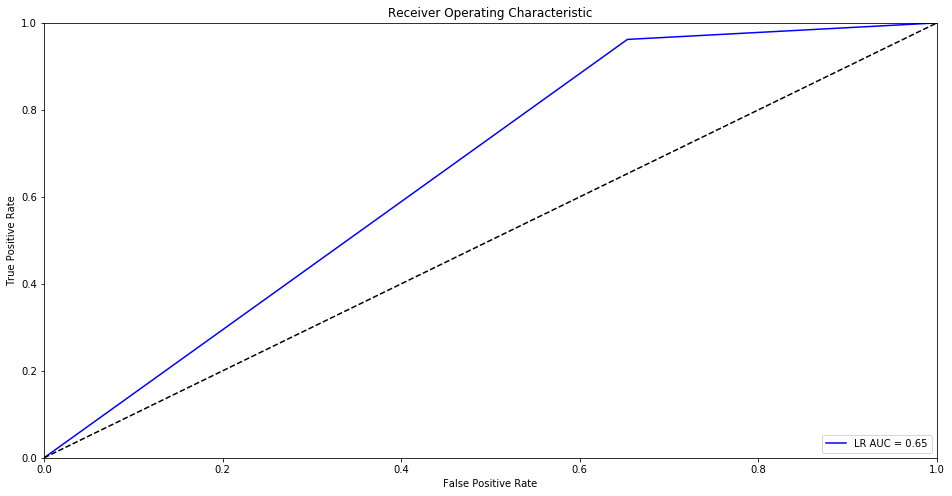

In [23]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
figu = plt.figure(figsize = (16, 8))
plt.title('Receiver Operating Characteristic'); plt.xlim([0, 1]); plt.ylim([0, 1])
plt.plot(fprLR, tprLR, 'b', label = 'LR AUC = %0.2f' % roc_auclin)
plt.plot([0, 1], [0, 1],'k--')
plt.ylabel('True Positive Rate'); plt.xlabel('False Positive Rate'); plt.legend(loc = 'lower right')
plt.show()

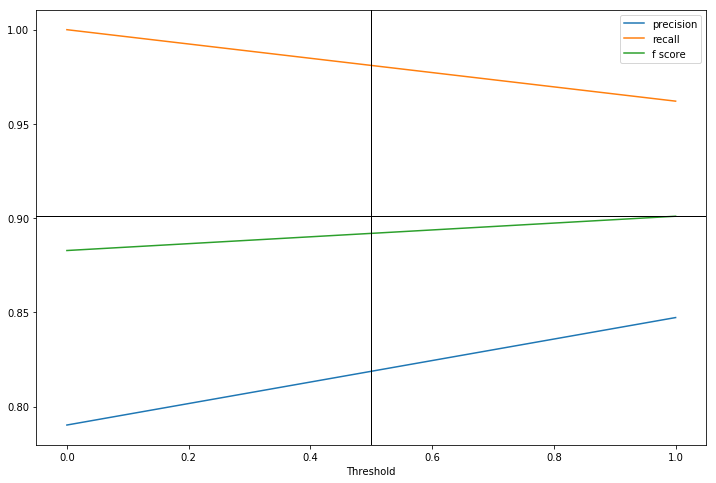

In [24]:
import numpy as np
pr, re, th = metrics.precision_recall_curve(y_test, ypredicted)
pr, re = pr[:-1], re[:-1]
fs = 2*np.divide(np.multiply(pr, re), np.add(pr, re))
f = metrics.f1_score(y_test, ypredicted)

plt.figure(figsize=(12,8))
plt.plot(th, pr, label = 'precision')
plt.plot(th, re, label = 'recall')
plt.plot(th, fs, label = 'f score')
plt.xlabel('Threshold')
plt.axvline(x=0.5, c='k', linewidth=1)
plt.axhline(y=f, c='k', linewidth=1)
plt.legend()

In [25]:
metrics.confusion_matrix(y_test, ypredicted)


array([[ 888, 1674],
       [ 366, 9286]])

In [63]:
from sklearn.ensemble import RandomForestClassifier
#rf = RandomForestClassifier(n_estimators = 100, min_samples_leaf=5, max_depth=5, random_state = 42)
rf = RandomForestClassifier(n_estimators=100, 
                               random_state=50, 
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)
rf.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.8s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=50, verbose=1, warm_start=False)

In [64]:
predictions = rf.predict(X_train)
errors = abs(predictions - y_train)
print("Mean Absolute Error for Train: ", round(np.mean(errors),2), " degrees")
predictions = rf.predict(X_test)
errors = abs(predictions - y_test)
print("Mean Absolute Error for test: ", round(np.mean(errors),2), " degrees")

[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.3s finished


Mean Absolute Error for Train:  0.0  degrees
Mean Absolute Error for test:  0.15  degrees


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


In [65]:
feature_list = list(X.columns)
class_name = 'Play'
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: ydstogo              Importance: 0.16
Variable: Touchdown_Prob       Importance: 0.12
Variable: Safety_Prob          Importance: 0.11
Variable: TimeSecs             Importance: 0.09
Variable: Field_Goal_Prob      Importance: 0.08
Variable: ydsnet               Importance: 0.07
Variable: ScoreDiff            Importance: 0.07
Variable: yrdline100           Importance: 0.06
Variable: posteam_timeouts_pre Importance: 0.02
Variable: down                 Importance: 0.0
Variable: GoalToGo             Importance: 0.0
Variable: ARI_o                Importance: 0.0
Variable: ATL_o                Importance: 0.0
Variable: BAL_o                Importance: 0.0
Variable: BUF_o                Importance: 0.0
Variable: CAR_o                Importance: 0.0
Variable: CHI_o                Importance: 0.0
Variable: CIN_o                Importance: 0.0
Variable: CLE_o                Importance: 0.0
Variable: DAL_o                Importance: 0.0
Variable: DEN_o                Importance: 0.0
Vari

In [66]:
import matplotlib.pyplot as plt
def plot_decisiontree(img_name):
    tree_image = plt.imread(img_name)
    plt.figure(figsize=(100,10))
    plt.xticks([])
    plt.yticks([])
    plt.imshow(tree_image)
    plt.show()

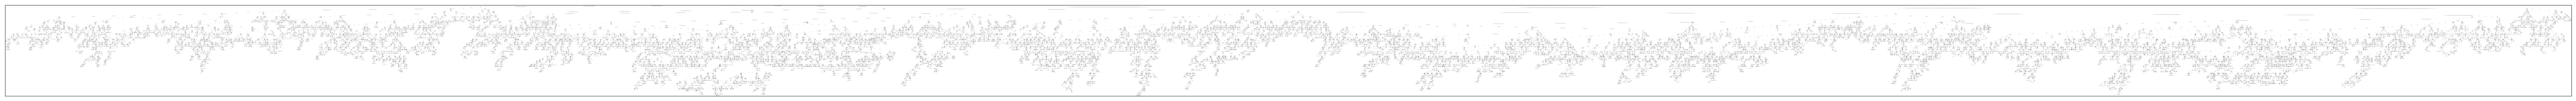

In [67]:
from sklearn.tree import export_graphviz
import pydot
feature_list = list(X.columns)
rf_tree = rf.estimators_[5]
export_graphviz(rf_tree, out_file = 'rf.dot', feature_names = feature_list, rounded = True, precision = 1)
# Write graph to a png file
(graph_rf, ) = pydot.graph_from_dot_file('rf.dot')
graph_rf.write_png('rf.png')
plot_decisiontree('rf.png')

In [59]:
fprLR, tprLR, thresholdLR = metrics.roc_curve(y_test, predictions)
roc_auclin = metrics.auc(fprLR, tprLR)
roc_auclin

0.70558378487848639

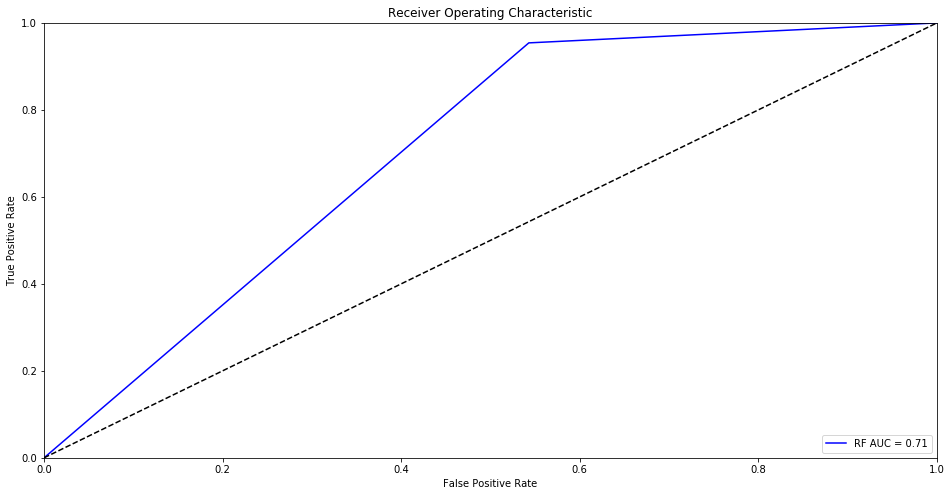

In [60]:
figu = plt.figure(figsize = (16, 8))
plt.title('Receiver Operating Characteristic'); plt.xlim([0, 1]); plt.ylim([0, 1])
plt.plot(fprLR, tprLR, 'b', label = 'RF AUC = %0.2f' % roc_auclin)
plt.plot([0, 1], [0, 1],'k--')
plt.ylabel('True Positive Rate'); plt.xlabel('False Positive Rate'); plt.legend(loc = 'lower right')
plt.show()

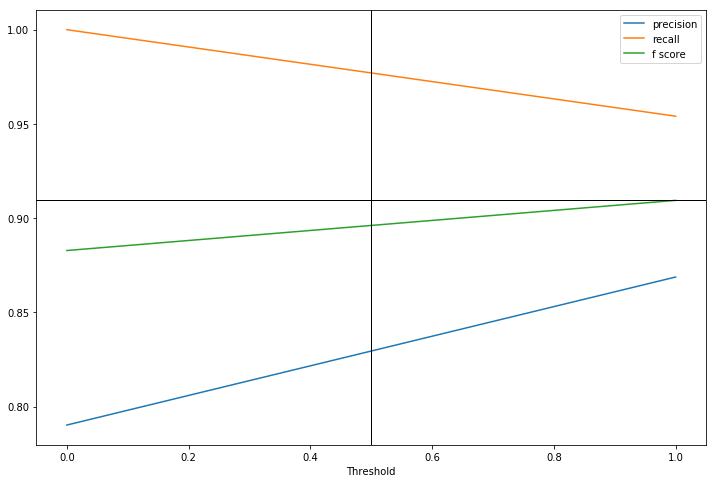

In [61]:
pr, re, th = metrics.precision_recall_curve(y_test, predictions)
pr, re = pr[:-1], re[:-1]
fs = 2*np.divide(np.multiply(pr, re), np.add(pr, re))
f = metrics.f1_score(y_test, predictions)

plt.figure(figsize=(12,8))
plt.plot(th, pr, label = 'precision')
plt.plot(th, re, label = 'recall')
plt.plot(th, fs, label = 'f score')
plt.xlabel('Threshold')
plt.axvline(x=0.5, c='k', linewidth=1)
plt.axhline(y=f, c='k', linewidth=1)
plt.legend()

In [62]:
metrics.confusion_matrix(y_test, predictions)

array([[1171, 1391],
       [ 443, 9209]])